In [119]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image


In [120]:
from sklearn.cluster import KMeans

In [121]:
from sklearn.datasets import load_digits


In [122]:
digits = load_digits()
data = digits.data


In [123]:
print(data.shape)

(1797, 64)


In [124]:
data = 255-data
np.random.seed(1)

In [125]:
n = 10
kmeans = KMeans(n_clusters=n,init='random')
kmeans.fit(data)
Z = kmeans.predict(data)

/home/franks/.local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


cluster 0
182 elementos


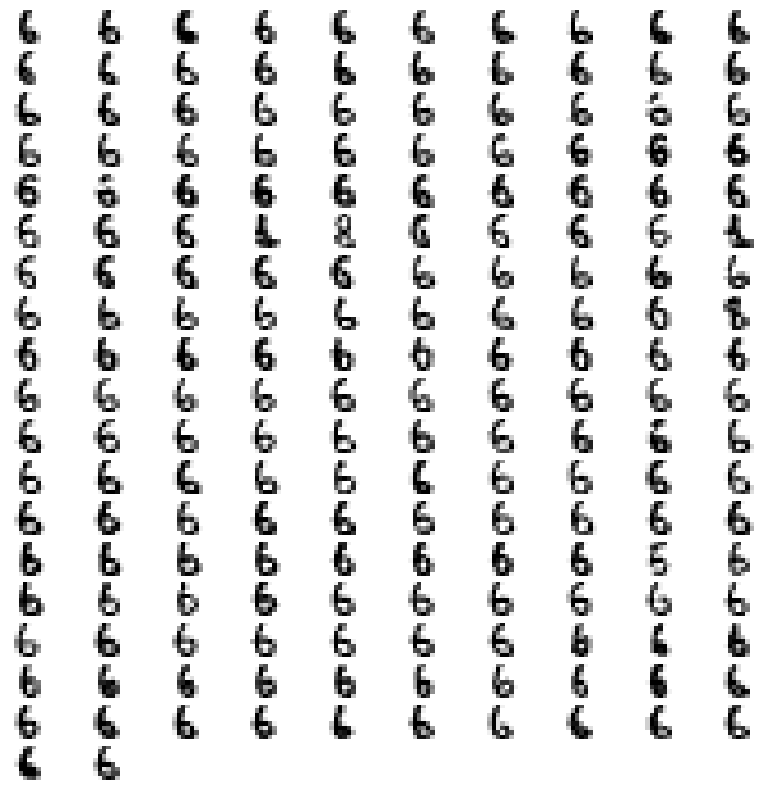

cluster 1
176 elementos


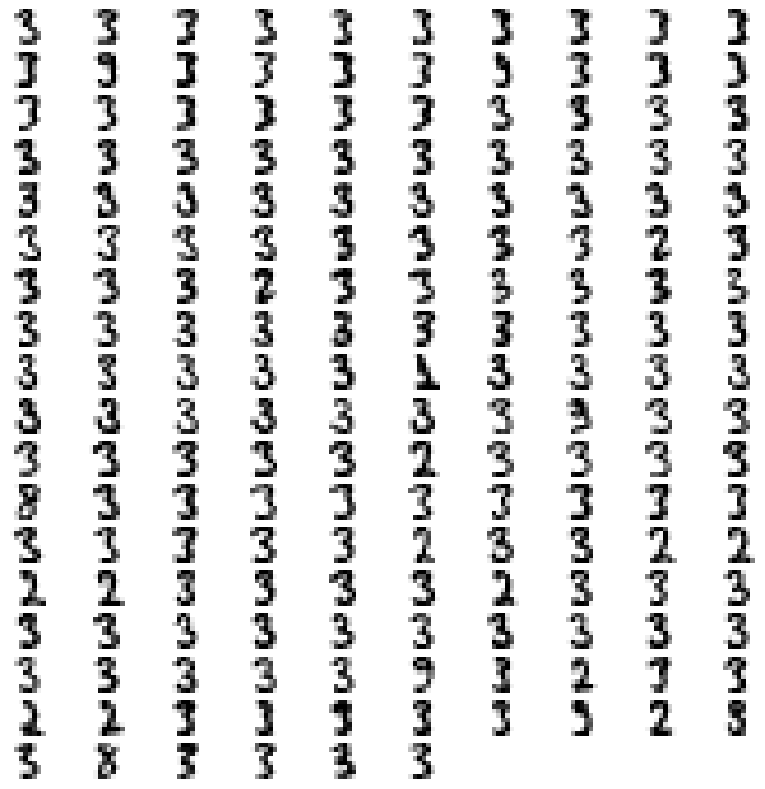

cluster 2
169 elementos


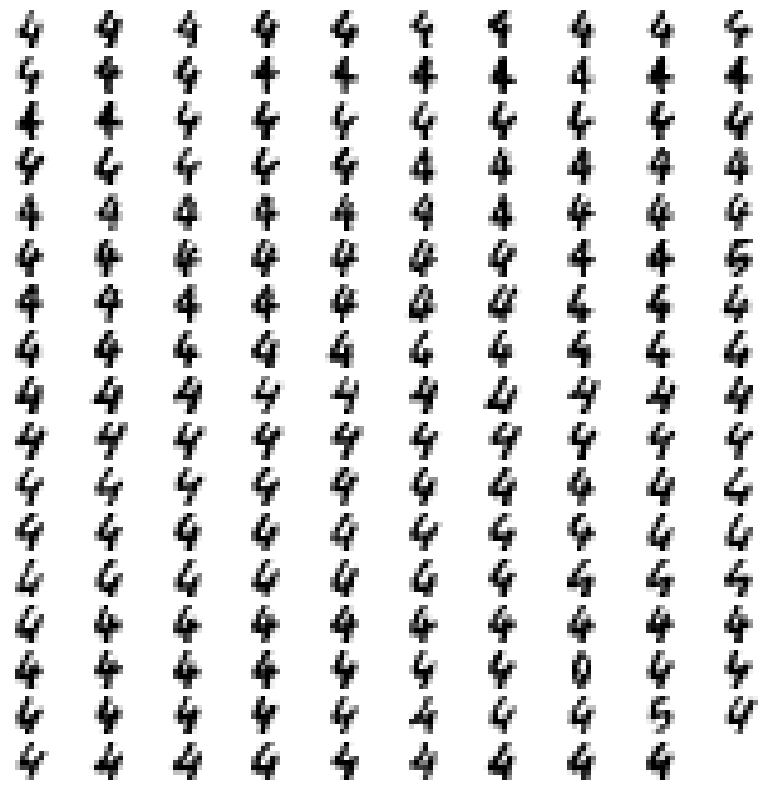

cluster 3
248 elementos


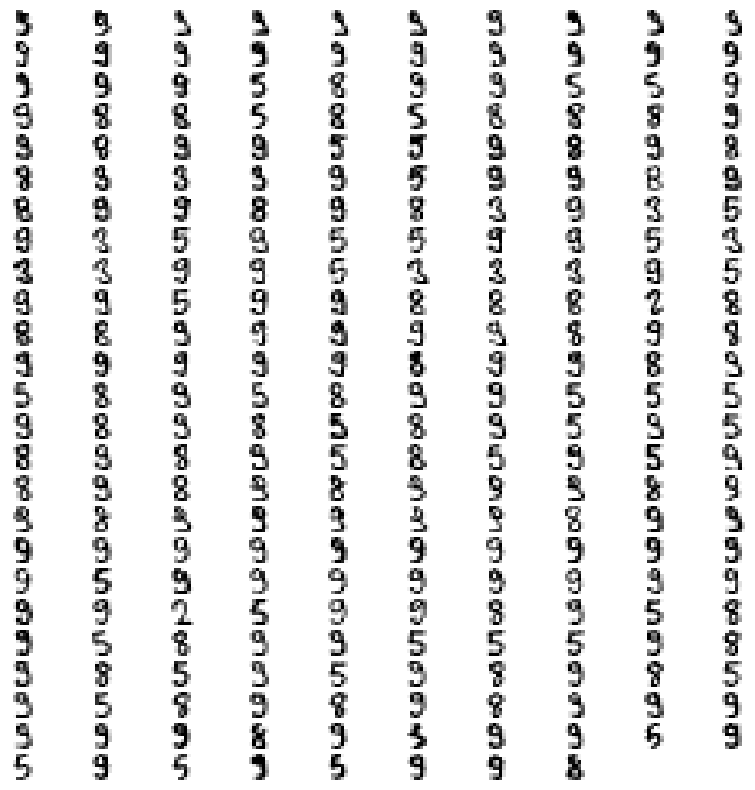

cluster 4
223 elementos


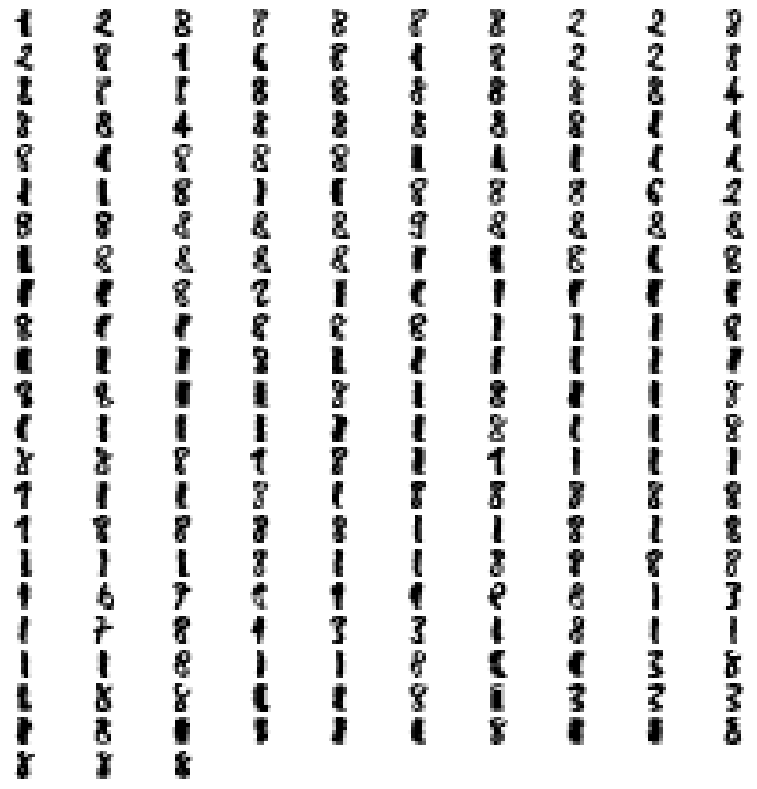

cluster 5
149 elementos


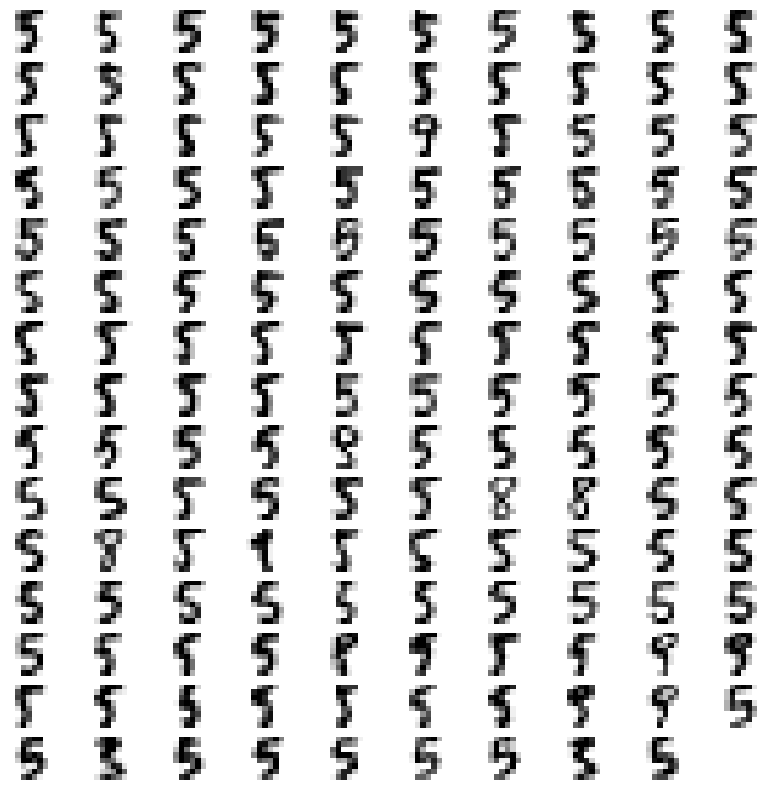

cluster 6
174 elementos


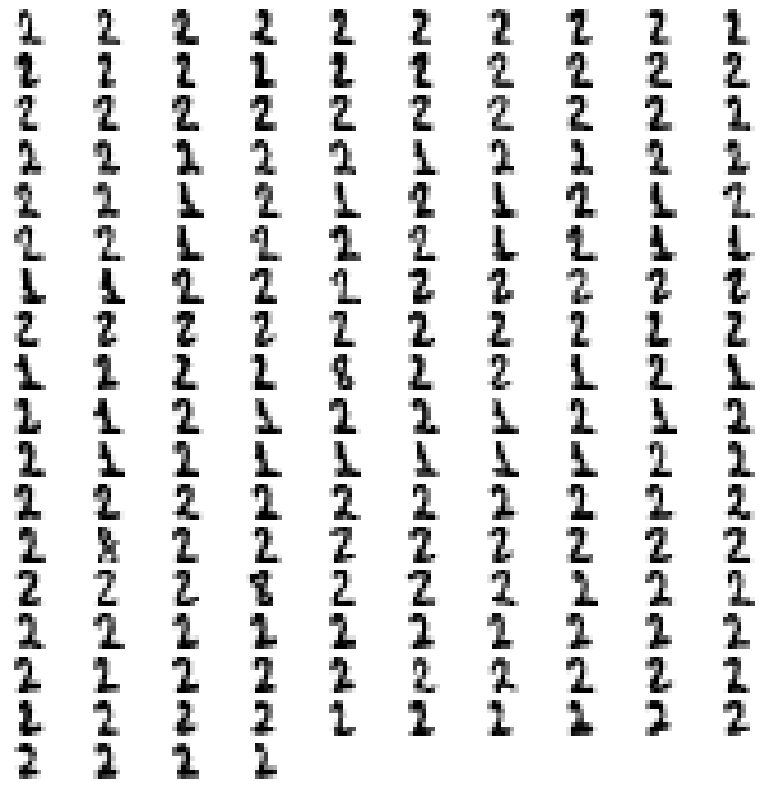

cluster 7
209 elementos


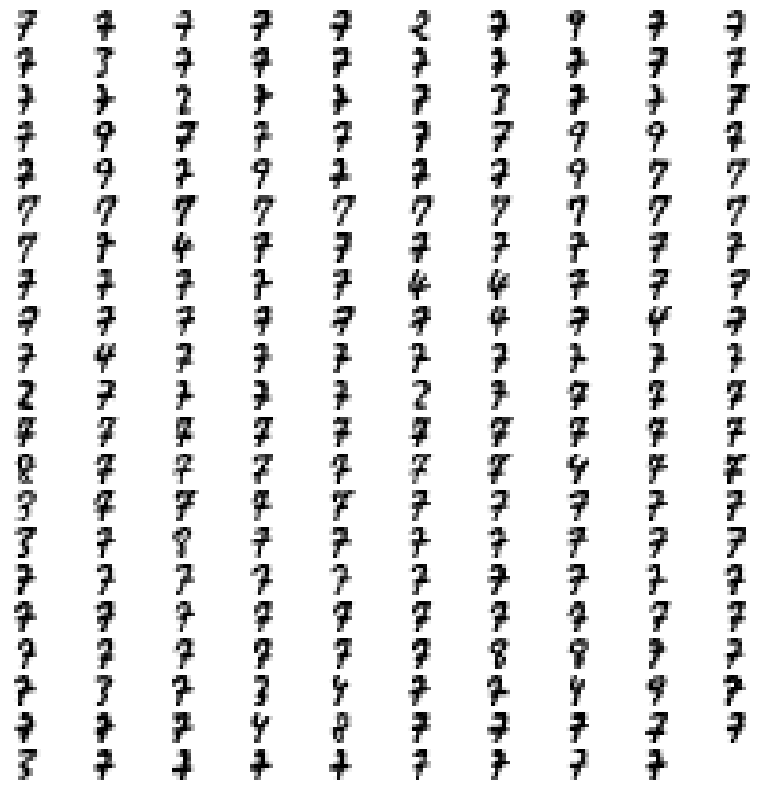

cluster 8
88 elementos


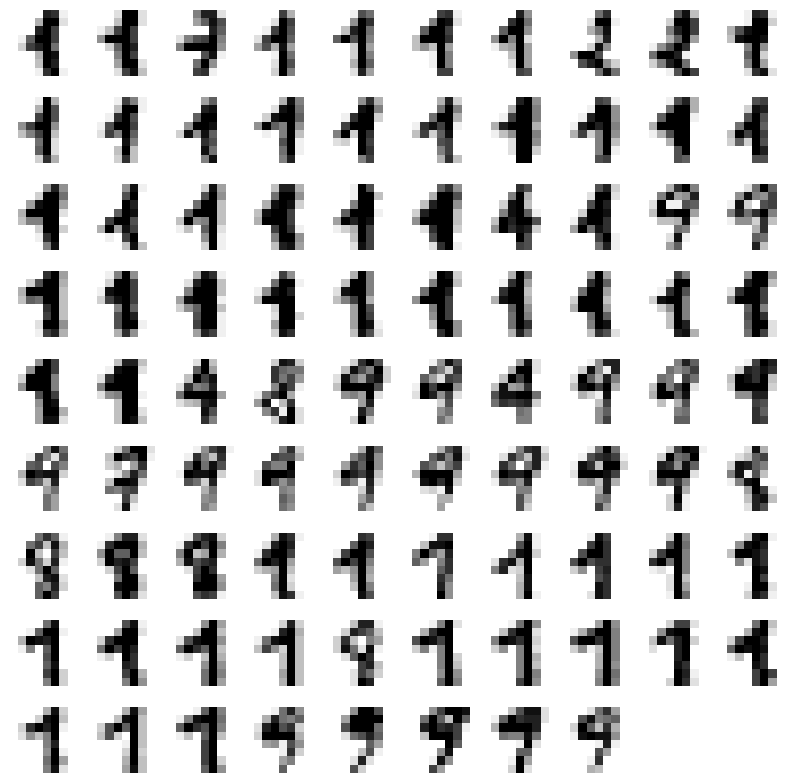

cluster 9
179 elementos


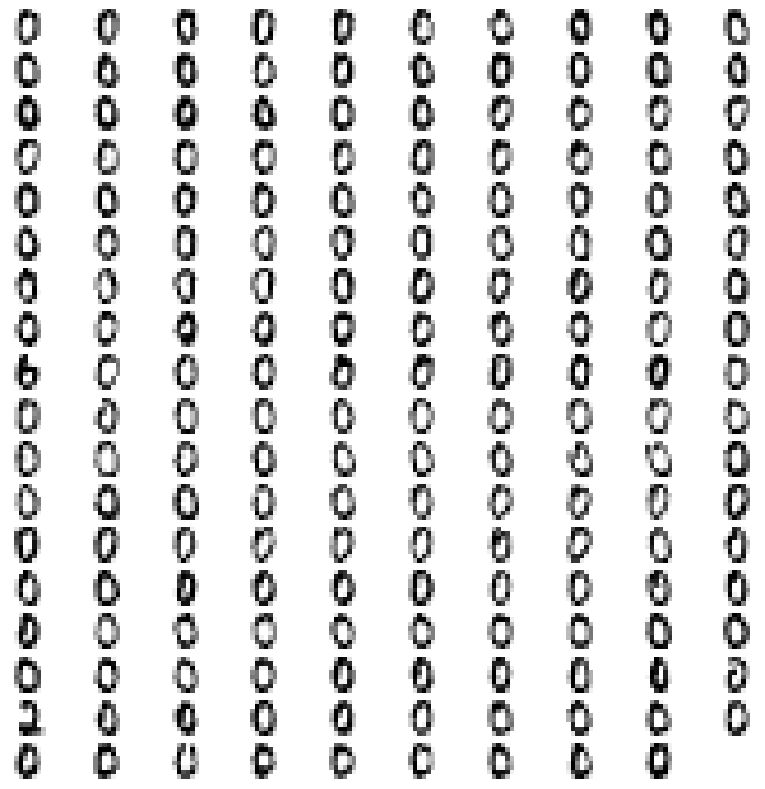

In [126]:
for i in range(0, n):
    fila = np.where(Z == i)[0]  # filas en Z donde están las imágenes de cada clúster
    num = fila.shape[0]  # número de imágenes en cada clúster
    r = (num // 10) + 1  # número de filas en la figura de salida

    print("cluster " + str(i))
    print(str(num) + " elementos")

    plt.figure(figsize=(10, 10))
    for k in range(0, num):
        plt.subplot(r, 10, k + 1)
        if k < len(fila):
            imagen = data[fila[k], ]
            imagen = imagen.reshape(8, 8)
            plt.imshow(imagen, cmap=plt.cm.gray)
            plt.axis('off')
    plt.show()


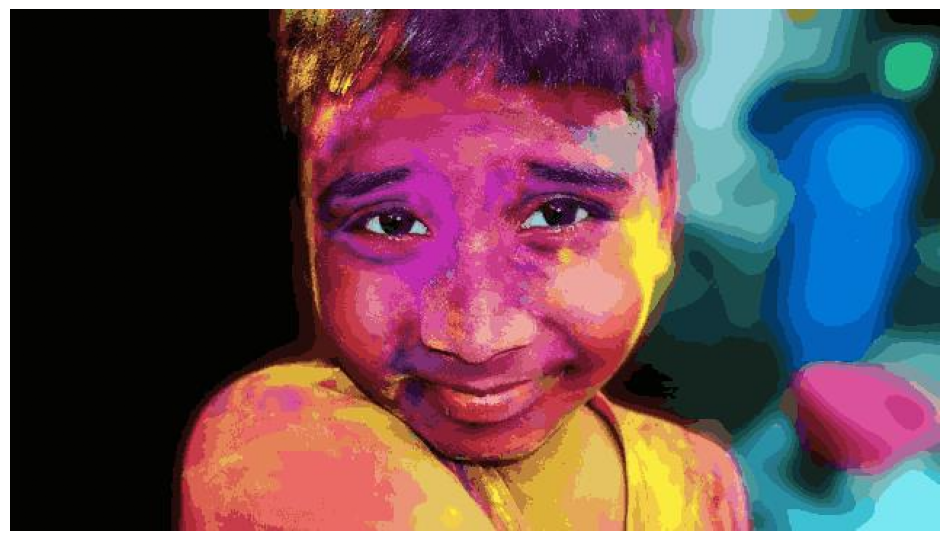

In [127]:
I = Image.open("tienda.jpg")
I1 = np.asarray(I,dtype=np.float32)/255
plt.figure(figsize=(12,12))
plt.imshow(I1)
plt.axis('off')
plt.show()


In [128]:
w, h = I.size
colors = I.getcolors(w * h)
num_colores = len(colors) 
num_pixels = w*h 

print (u'Número de pixels  = ', num_pixels)
print (u'Número de colores = ', num_colores)

Número de pixels  =  229760
Número de colores =  75122


In [129]:
R = I1[:,:,0]
G = I1[:,:,1]
B = I1[:,:,2]

In [130]:
XR = R.reshape((-1, 1))  
XG = G.reshape((-1, 1)) 
XB = B.reshape((-1, 1)) 
X = np.concatenate((XR,XG,XB),axis=1)

In [131]:
n = 60
k_means = KMeans(n_clusters=n)
k_means.fit(X)

/home/franks/.local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=60)

In [132]:
centroides = k_means.cluster_centers_
etiquetas = k_means.labels_

In [133]:
m = XR.shape
for i in range(m[0]):
    XR[i] = centroides[etiquetas[i]][0] 
    XG[i] = centroides[etiquetas[i]][1] 
    XB[i] = centroides[etiquetas[i]][2] 
XR.shape = R.shape 
XG.shape = G.shape
XB.shape = B.shape 
XR = XR[:, :, np.newaxis]  
XG = XG[:, :, np.newaxis]
XB = XB[:, :, np.newaxis]

Y = np.concatenate((XR,XG,XB),axis=2)

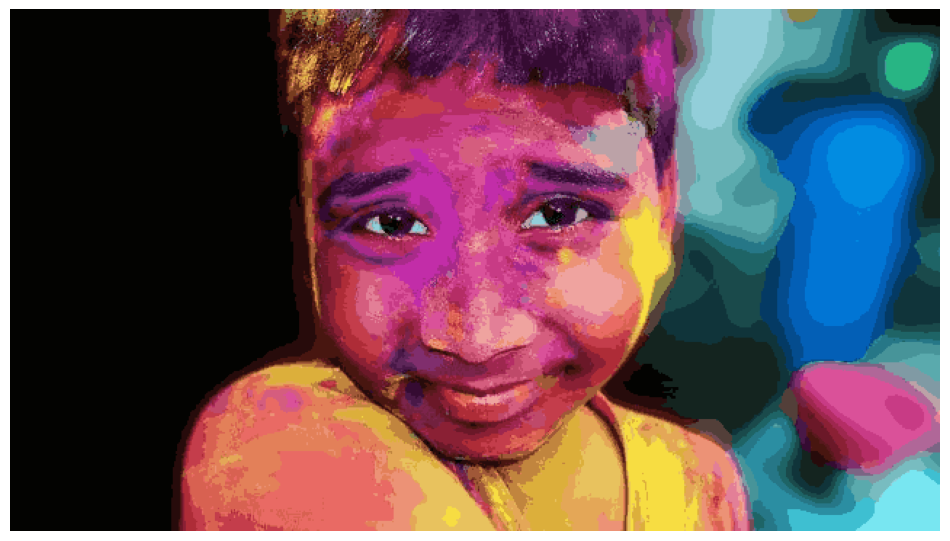

In [134]:
plt.figure(figsize=(12,12))
plt.imshow(Y)
plt.axis('off')
plt.show()

In [135]:
print (u'Número de pixels  = ', num_pixels)
print (u'Número de colores = ', n)

Número de pixels  =  229760
Número de colores =  60


In [136]:
Y1 = np.floor(Y*255)
Image.fromarray(Y1.astype(np.uint8)).save("tienda_comprimida.jpg")

# Segmentacion

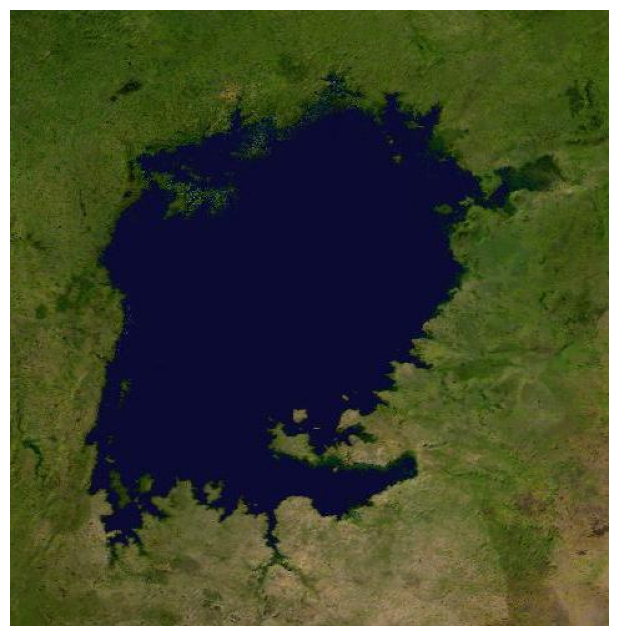

In [137]:
I = Image.open("Lago_Victoria.jpg")

plt.figure(figsize=(8,8))
plt.imshow(I)
plt.axis('off')
plt.show()

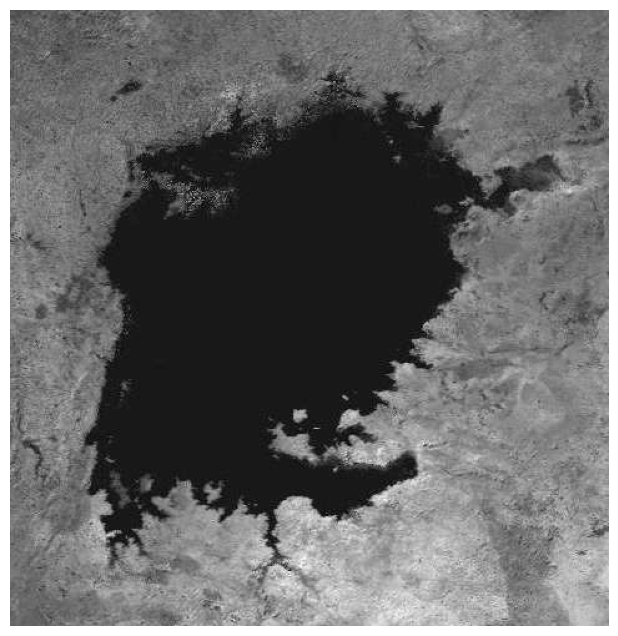

In [138]:
I1 = I.convert('L')
I2 = np.asarray(I1, dtype=float)
plt.figure(figsize=(8,8))
plt.imshow(I2,cmap='gray')
plt.axis('off')
plt.show()



In [139]:
X = I2.reshape((-1, 1))

In [140]:
k_means = KMeans(n_clusters=3)
k_means.fit(X) 


/home/franks/.local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

In [141]:
centroides = k_means.cluster_centers_
etiquetas = k_means.labels_


In [142]:
I2_compressed = np.choose(etiquetas, centroides)
I2_compressed.shape = I2.shape


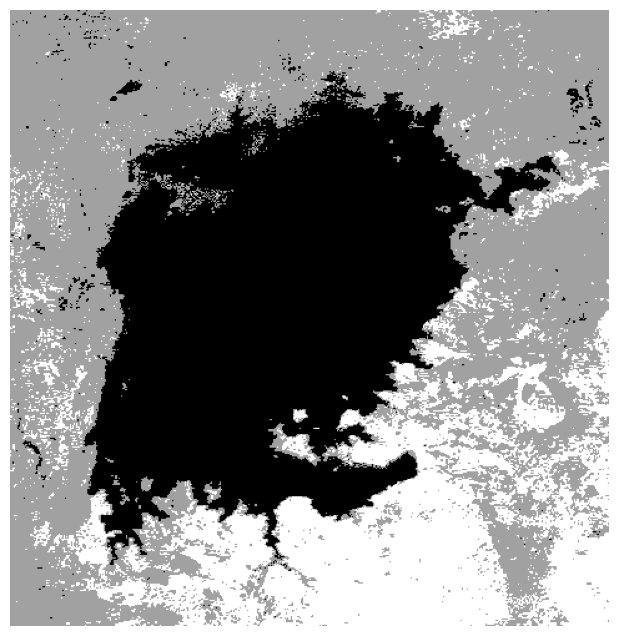

In [143]:
plt.figure(figsize=(8,8))
plt.imshow(I2_compressed,cmap='gray')
plt.axis('off')
plt.show()


In [144]:
I2 = (I2_compressed-np.min(I2_compressed))/(np.max(I2_compressed)-np.min(I2_compressed))*255
I2 = Image.fromarray(I2.astype(np.uint8))
w, h =I2.size
colors = I2.getcolors(w * h)
print (colors)

[(79262, 0), (109315, 160), (48543, 255)]


In [145]:
print (u'Área = ',  float(210000)*float(colors[0][0])/float(w*h), 'km2')

Área =  70196.60931174089 km2
